In [1]:
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from IPython.display import display, HTML

IMPORT DATA

In [3]:
# Load the data with the specific file path and sheet name
file_path = "Beta.xlsx"
sheet_name = "C_B_H_A"

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows
print("Original Data Preview:")
display(df.head())

Original Data Preview:


,C_E_R_F,C_E_R_C,C_E_R_T,C_E_R_P,C_E_R_O,C_E_L_F,C_E_L_C,C_E_L_T,C_E_L_P,C_E_L_O,...,D_I_R_F,D_I_R_C,D_I_R_T,D_I_R_P,D_I_R_O,D_I_L_F,D_I_L_C,D_I_L_T,D_I_L_P,D_I_L_O
0,0.009976,0.033715,0.029563,0.167518,0.253930,0.105528,0.223922,0.199976,0.195153,0.261237,...,0.010372,-0.025755,-0.029100,-0.087507,0.038920,-0.059731,-0.094300,-0.126814,-0.077668,-0.048966
1,-0.012257,0.085912,0.008746,0.148260,0.218983,-0.116994,-0.177708,-0.104965,-0.037166,0.002524,...,0.091383,0.138810,0.114269,0.093119,-0.044211,0.013364,-0.003106,-0.053305,0.024397,-0.030711
2,-0.040618,-0.052404,-0.111075,-0.129617,0.072817,-0.044505,0.019566,-0.081525,-0.105449,-0.030718,...,-0.060737,-0.026176,0.035590,-0.068759,-0.012463,-0.173157,-0.240697,-0.168523,-0.154770,-0.112264
3,0.045088,0.002263,0.122475,0.044976,0.332086,0.089827,0.055167,0.032583,0.042645,0.108981,...,0.089853,0.093420,0.058372,0.027325,0.042622,0.008687,-0.079272,-0.184898,-0.150721,-0.156000
4,0.111273,0.193918,0.178798,0.146253,0.267141,0.027707,0.081096,0.181663,0.092671,0.183599,...,0.081057,0.124703,0.081104,-0.033414,-0.107290,0.000230,-0.035353,-0.084316,-0.190016,-0.245558


In [13]:
# Reshape the data: Convert wide format to long format
df_long = df.melt(var_name="Factor_Combination", value_name="Value")

# Extract factor levels from column names
df_long[['Condition', 'Background','Hemisphere', 'Area']] = df_long['Factor_Combination'].str.split('_', expand=True)

# Drop the original column name field
df_long.drop(columns=['Factor_Combination'], inplace=True)

# Convert categorical variables
df_long['Condition'] = df_long['Condition'].map({'C': 'Convergent', 'D': 'Divergent'})
df_long['Background'] = df_long['Background'].map({'E': 'EDs', 'I': 'IDEs'})
df_long['Hemisphere'] = df_long['Hemisphere'].map({'R': 'Right', 'L': 'Left'})
df_long['Area'] = df_long['Area'].map({'F': 'Frontal', 'C': 'Central', 'T': 'Temporal', 'P': 'Parietal', 'O': 'Occipital'})


# Display the transformed dataset
df_long.head()

,Value,Condition,Background,Hemisphere,Area
0,0.009976,Convergent,EDs,Right,Frontal
1,-0.012257,Convergent,EDs,Right,Frontal
2,-0.040618,Convergent,EDs,Right,Frontal
3,0.045088,Convergent,EDs,Right,Frontal
4,0.111273,Convergent,EDs,Right,Frontal


In [14]:
# Check missing values by each combination of factors
missing_by_combination = df_long[df_long['Value'].isna()]
print(missing_by_combination.groupby(['Condition', 'Background', 'Hemisphere', 'Area']).size())

Condition   Background  Hemisphere  Area     
Convergent  EDs         Left        Central       71
                                    Frontal       71
                                    Occipital     71
                                    Parietal      71
                                    Temporal      71
                        Right       Central       71
                                    Frontal       71
                                    Occipital     71
                                    Parietal      71
                                    Temporal      71
            IDEs        Left        Central      143
                                    Frontal      143
                                    Occipital    143
                                    Parietal     143
                                    Temporal     143
                        Right       Central      143
                                    Frontal      143
                                    Occipital    143


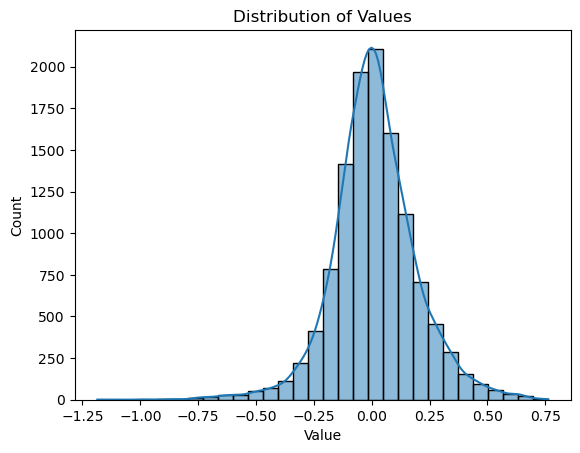

In [15]:
sns.histplot(df_long['Value'], bins=30, kde=True)
plt.title("Distribution of Values")
plt.show()

In [16]:
# Check the number of occurrences for each combination of factors
factor_counts = df_long.groupby(['Condition', 'Background', 'Hemisphere', 'Area']).size().reset_index(name='Counts')

# Display combinations with no data
empty_combinations = factor_counts[factor_counts['Counts'] == 0]
print(empty_combinations)

Empty DataFrame
Columns: [Condition, Background, Hemisphere, Area, Counts]
Index: []


In [17]:
# Remove rows with missing values
df_long_clean = df_long.dropna(subset=['Condition', 'Background', 'Hemisphere', 'Area', 'Value'])

In [18]:
print(df_long.head())

      Value   Condition Background Hemisphere     Area
0  0.009976  Convergent        EDs      Right  Frontal
1 -0.012257  Convergent        EDs      Right  Frontal
2 -0.040618  Convergent        EDs      Right  Frontal
3  0.045088  Convergent        EDs      Right  Frontal
4  0.111273  Convergent        EDs      Right  Frontal


In [19]:
print(df_long['Value'].isna().sum())

3150


In [20]:
group_sizes = df_long.groupby(['Condition', 'Background', 'Hemisphere', 'Area']).size().reset_index(name='Sample_Count')
print(group_sizes)

     Condition Background Hemisphere       Area  Sample_Count
0   Convergent        EDs       Left    Central           373
1   Convergent        EDs       Left    Frontal           373
2   Convergent        EDs       Left  Occipital           373
3   Convergent        EDs       Left   Parietal           373
4   Convergent        EDs       Left   Temporal           373
5   Convergent        EDs      Right    Central           373
6   Convergent        EDs      Right    Frontal           373
7   Convergent        EDs      Right  Occipital           373
8   Convergent        EDs      Right   Parietal           373
9   Convergent        EDs      Right   Temporal           373
10  Convergent       IDEs       Left    Central           373
11  Convergent       IDEs       Left    Frontal           373
12  Convergent       IDEs       Left  Occipital           373
13  Convergent       IDEs       Left   Parietal           373
14  Convergent       IDEs       Left   Temporal           373
15  Conv

In [21]:
# Re-run the ANOVA test
anova_results = pg.anova(
    dv="Value",
    between=["Condition", "Background", "Hemisphere", "Area"],
    data=df_long_clean,
    detailed=True
)

# Display results
print(anova_results)

                                        Source          SS       DF        MS  \
0                                    Condition    5.001505      1.0  5.001505   
1                                   Background    2.192660      1.0  2.192660   
2                                   Hemisphere    1.057305      1.0  1.057305   
3                                         Area    1.361816      4.0  0.340454   
4                       Condition * Background    3.352414      1.0  3.352414   
5                       Condition * Hemisphere    0.000058      1.0  0.000058   
6                      Background * Hemisphere    0.017558      1.0  0.017558   
7                             Condition * Area    0.193276      4.0  0.048319   
8                            Background * Area    0.126087      4.0  0.031522   
9                            Hemisphere * Area    0.121669      4.0  0.030417   
10         Condition * Background * Hemisphere    0.001907      1.0  0.001907   
11               Condition *

In [22]:
anova_results['Effect Size (η²)'] = anova_results['SS'] / anova_results['SS'].sum()
display(anova_results)

,Source,SS,DF,MS,F,p-unc,np2,Effect Size (η²)
0,Condition,5.001505,1.0,5.001505,154.635801,2.805596e-35,1.301140e-02,1.272415e-02
1,Background,2.192660,1.0,2.192660,67.792348,2.008453e-16,5.746189e-03,5.578268e-03
2,Hemisphere,1.057305,1.0,1.057305,32.689611,1.107516e-08,2.779093e-03,2.689853e-03
3,Area,1.361816,4.0,0.340454,10.526107,1.642391e-08,3.576627e-03,3.464547e-03
4,Condition * Background,3.352414,1.0,3.352414,103.649449,3.045306e-24,8.758874e-03,8.528757e-03
5,Condition * Hemisphere,0.000058,1.0,0.000058,0.001808,9.660851e-01,1.541288e-07,1.487649e-07
6,Background * Hemisphere,0.017558,1.0,0.017558,0.542860,4.612644e-01,4.627752e-05,4.466907e-05
7,Condition * Area,0.193276,4.0,0.048319,1.493921,2.010477e-01,5.091767e-04,4.917071e-04
8,Background * Area,0.126087,4.0,0.031522,0.974585,4.199825e-01,3.322289e-04,3.207735e-04
9,Hemisphere * Area,0.121669,4.0,0.030417,0.940438,4.392487e-01,3.205922e-04,3.095344e-04


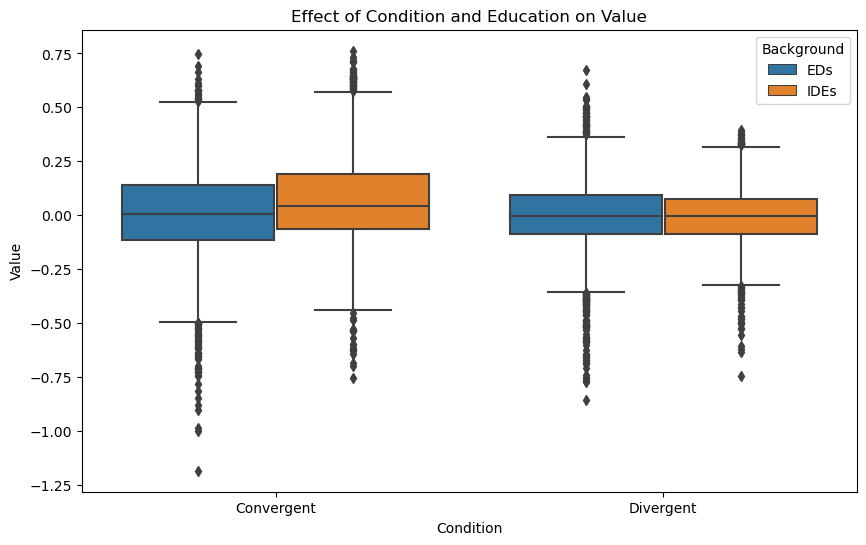

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Condition", y="Value", hue="Background", data=df_long)
plt.title("Effect of Condition and Education on Value")
plt.show()

In [24]:
import pingouin as pg

# List of factors
factors = ['Condition', 'Background', 'Hemisphere', 'Area']

# Run Tukey post-hoc test for each factor
posthoc_results = {}
for factor in factors:
    posthoc = pg.pairwise_tukey(
        data=df_long, 
        dv="Value", 
        between=[factor]
    )
    posthoc_results[factor] = posthoc
    display(posthoc)


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Convergent,Divergent,0.035467,-0.006248,0.041715,0.003363,12.403254,3.032685e-12,0.2297


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,EDs,IDEs,0.000646,0.02869,-0.028045,0.003397,-8.256546,3.032907e-12,-0.15387


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Left,Right,0.003129,0.022085,-0.018956,0.003365,-5.633279,1.809017e-08,-0.103843


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Central,Frontal,0.000824,0.002929,-0.002105,0.005319,-0.395763,9.948307e-01,-0.011757
1,Central,Occipital,0.000824,0.030687,-0.029863,0.005319,-5.614358,2.012273e-07,-0.162021
2,Central,Parietal,0.000824,0.011709,-0.010885,0.005319,-2.046440,2.439349e-01,-0.058047
3,Central,Temporal,0.000824,0.016886,-0.016062,0.005319,-3.019656,2.136820e-02,-0.089319
4,Frontal,Occipital,0.002929,0.030687,-0.027758,0.005319,-5.218594,1.823069e-06,-0.153909
5,Frontal,Parietal,0.002929,0.011709,-0.008780,0.005319,-1.650677,4.649062e-01,-0.047815
6,Frontal,Temporal,0.002929,0.016886,-0.013957,0.005319,-2.623893,6.614226e-02,-0.079408
7,Occipital,Parietal,0.030687,0.011709,0.018978,0.005319,3.567917,3.323158e-03,0.100534
8,Occipital,Temporal,0.030687,0.016886,0.013801,0.005319,2.594702,7.136133e-02,0.076197
9,Parietal,Temporal,0.011709,0.016886,-0.005177,0.005319,-0.973216,8.673375e-01,-0.028075


<Figure size 1500x1000 with 0 Axes>

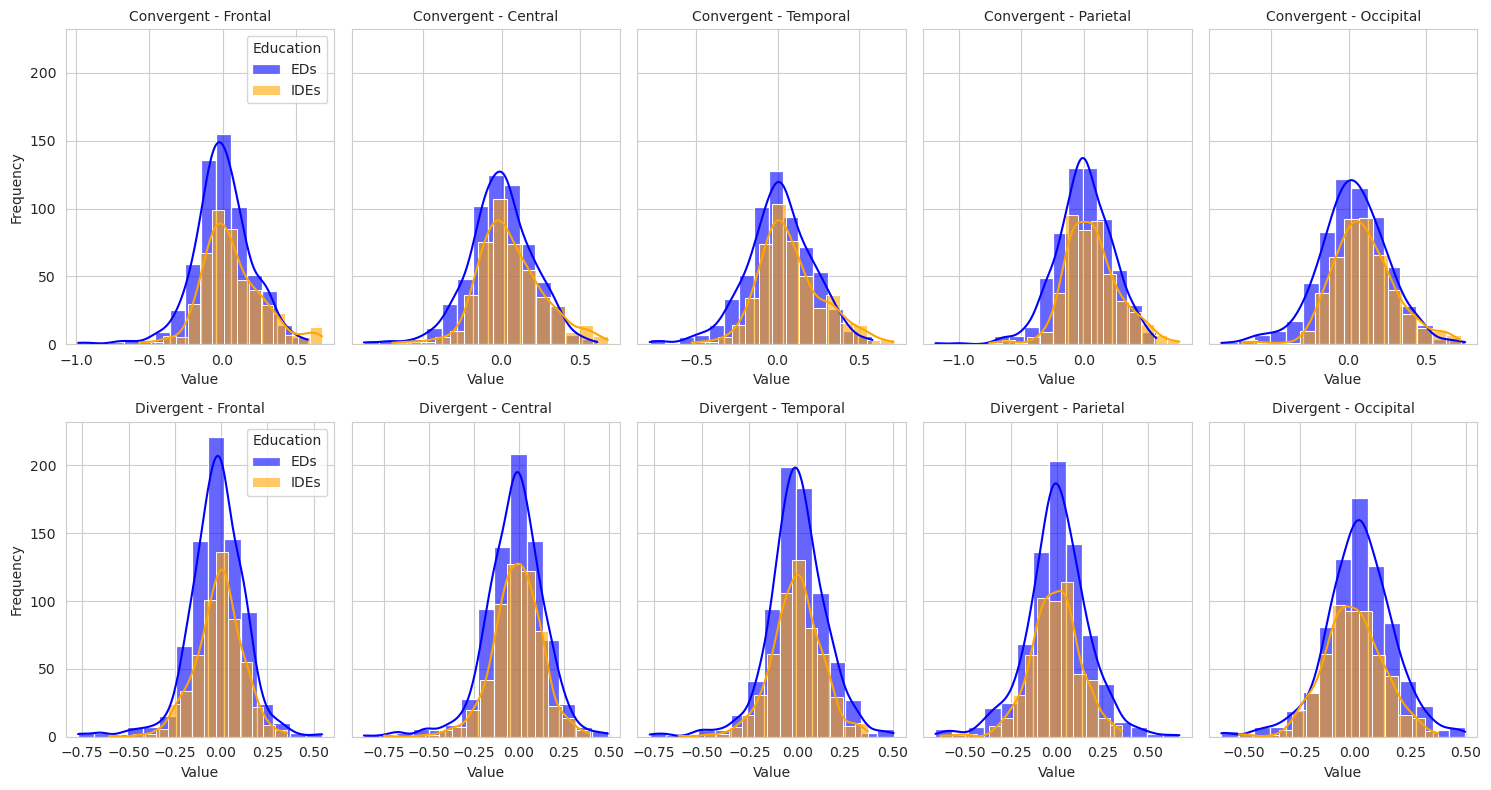

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Define colors for Education backgrounds
education_colors = {"EDs": "blue", "IDEs": "orange"}

# Get unique conditions
conditions = df_long["Condition"].unique()
areas = df_long["Area"].unique()

# Create subplots: One row per condition
fig, axes = plt.subplots(nrows=len(conditions), ncols=len(areas), figsize=(15, 8), sharey=True)

# Loop through conditions and areas to create paired histograms
for row_idx, condition in enumerate(conditions):
    for col_idx, area in enumerate(areas):
        ax = axes[row_idx, col_idx]  # Get subplot
        
        # Filter data for this condition and area
        subset = df_long[(df_long["Condition"] == condition) & (df_long["Area"] == area)]
        
        # Plot histograms for both education backgrounds
        for education in education_colors.keys():
            sns.histplot(
                subset[subset["Background"] == education]["Value"],
                bins=15,
                kde=True,
                color=education_colors[education],
                label=education,
                alpha=0.6,
                ax=ax
            )

        # Titles and labels
        ax.set_title(f"{condition} - {area}", fontsize=10)
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

        # Add legend only for the first subplot in each row
        if col_idx == 0:
            ax.legend(title="Education")

# Adjust layout
plt.tight_layout()
plt.show()

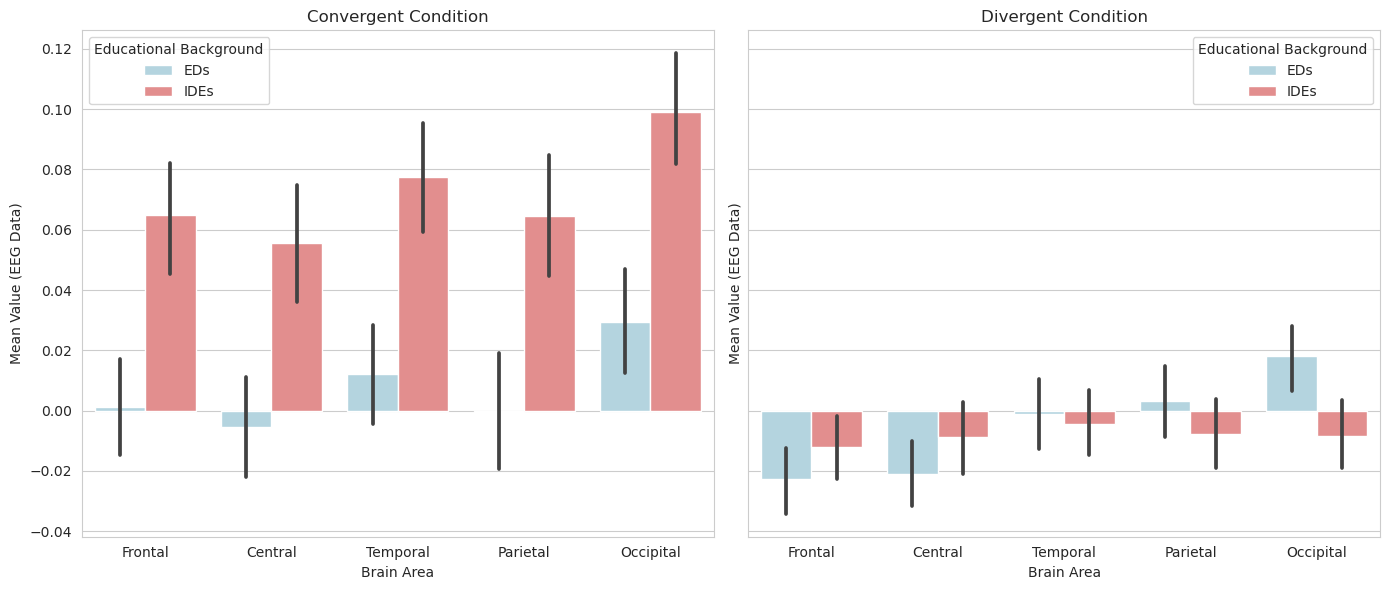

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}

# Get unique conditions and areas
conditions = df_long["Condition"].unique()
areas = df_long["Area"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Area, colored by Education)
    sns.barplot(
        data=subset,
        x="Area",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Brain Area")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with soft colors as an image file
plt.savefig("Beta_TRPs_by_Area-coloured-soft.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

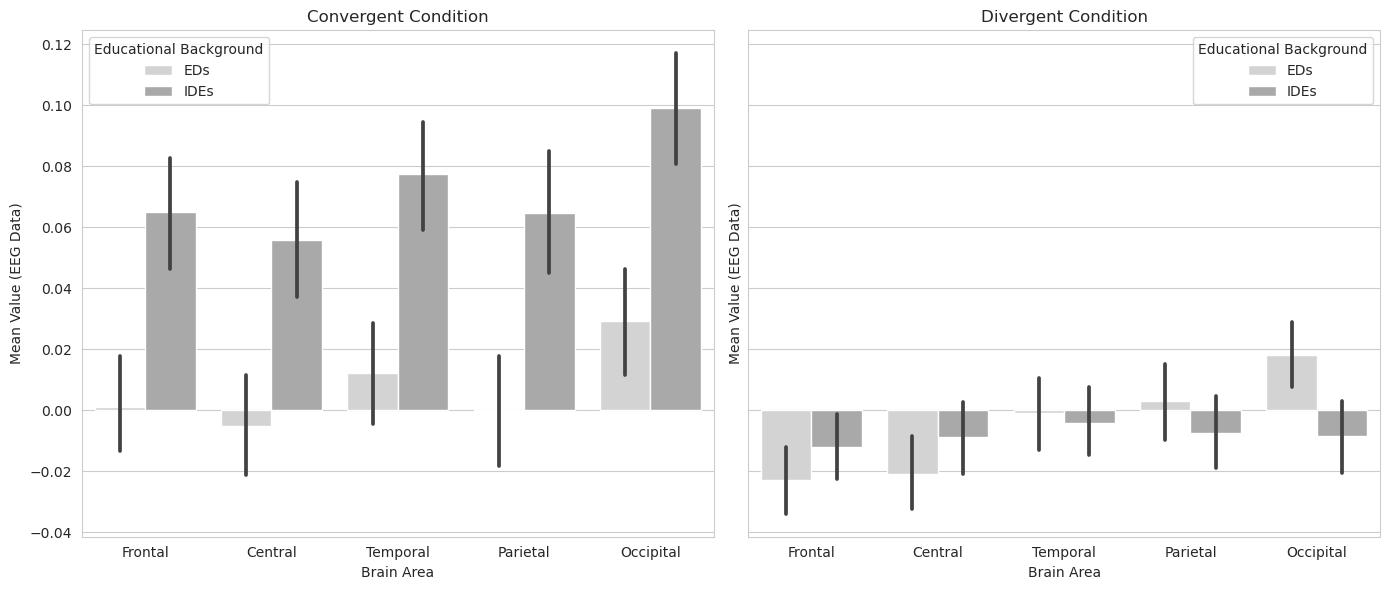

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define grayscale colors for Education backgrounds (using light grey for "EDs" and dark grey for "IDEs")
education_colors = {"EDs": "lightgrey", "IDEs": "darkgrey"}

# Get unique conditions and areas
conditions = df_long["Condition"].unique()
areas = df_long["Area"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Area, colored by Education in grayscale)
    sns.barplot(
        data=subset,
        x="Area",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Brain Area")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

plt.savefig("Beta_TRPs_by_Area_greyScale.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

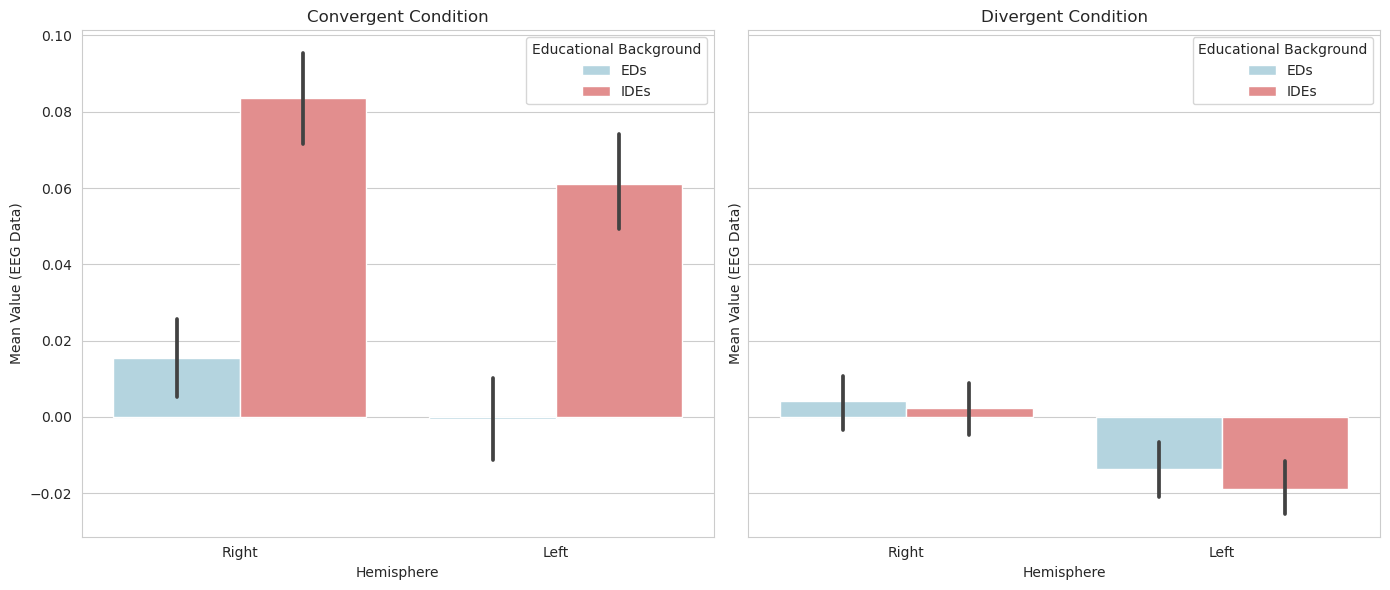

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}

# Get unique conditions
conditions = df_long["Condition"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Hemisphere, colored by Education)
    sns.barplot(
        data=subset,
        x="Hemisphere",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Hemisphere")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with hemisphere on the x-axis as an image file
plt.savefig("Beta_TRPs_by_Hemisphere-coloured-soft.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

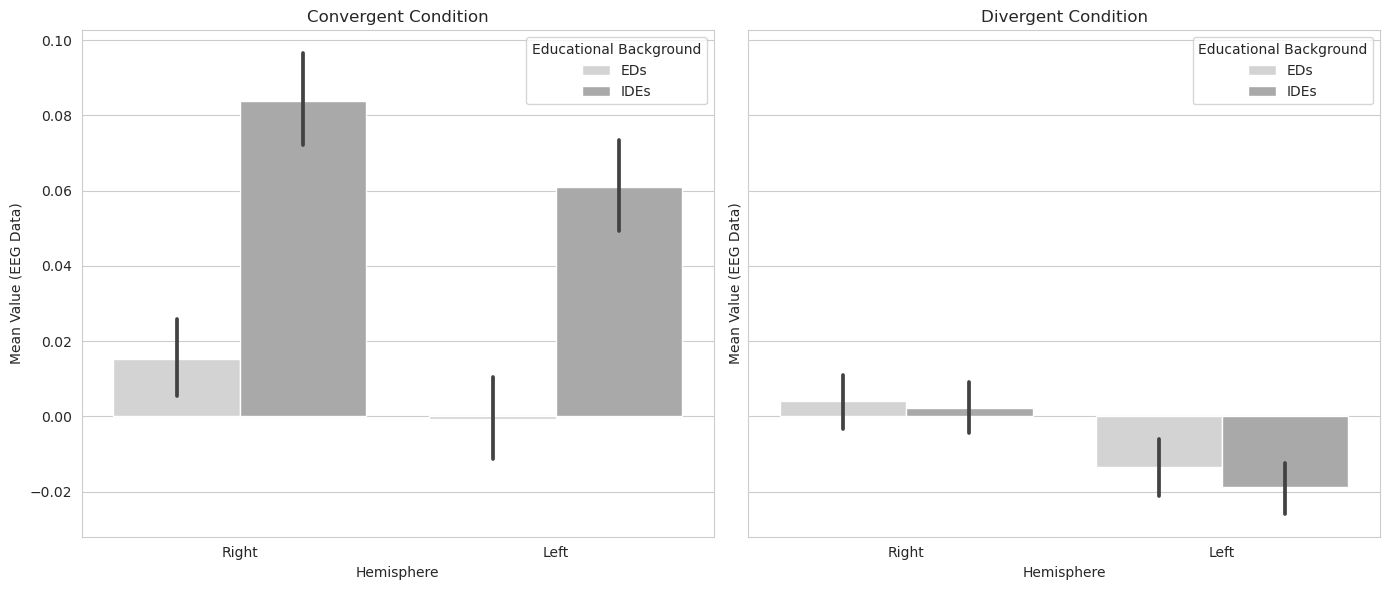

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define grey scale colors for Education backgrounds
education_colors = {"EDs": "lightgrey", "IDEs": "darkgrey"}

# Get unique conditions
conditions = df_long["Condition"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Hemisphere, colored by Education)
    sns.barplot(
        data=subset,
        x="Hemisphere",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Hemisphere")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with hemisphere on the x-axis as an image file
plt.savefig("Beta_TRPs_by_Hemisphere-grayscale.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()